# Heart_Diasese_Model

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScalerr
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib
import tkinter as tk
from tkinter import messagebox

# Load the Data

In [2]:
ds =pd.read_csv("heart.csv")

In [3]:
ds.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
ds.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
ds.shape

(1025, 14)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
ds['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
ds['slope'].unique()

array([2, 0, 1], dtype=int64)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

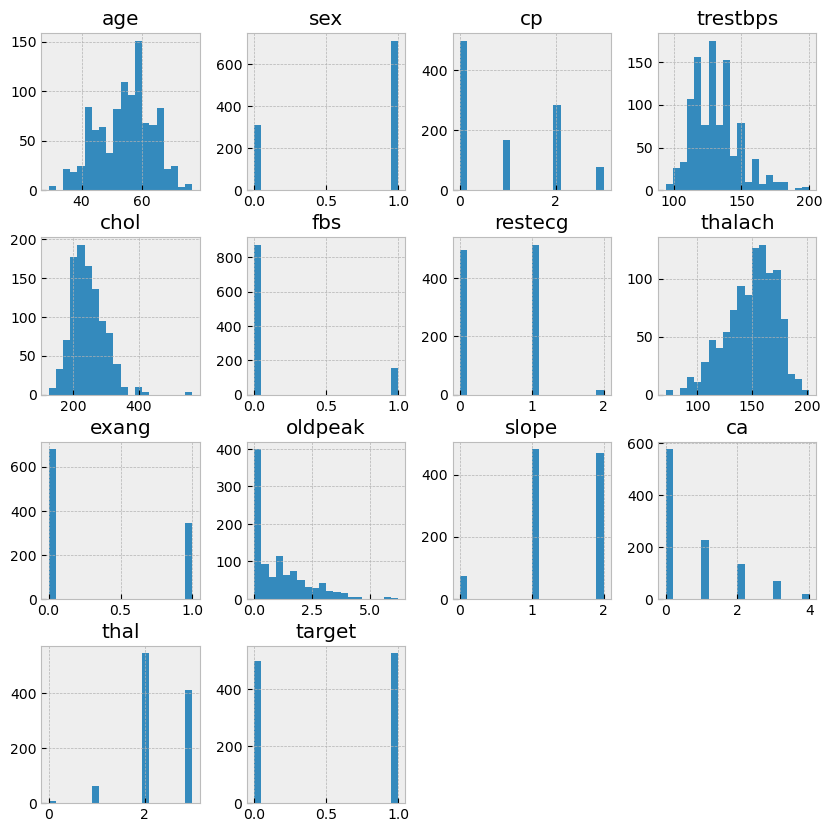

In [12]:
ds.hist(bins=20,figsize=(10,10))

# EDA 

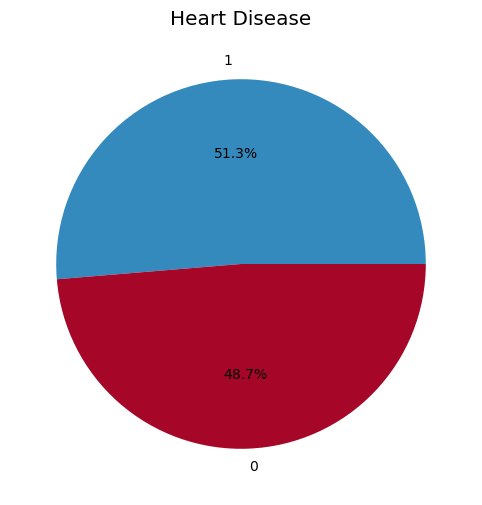

In [13]:
Heart_Disease_counts = ds["target"].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Heart_Disease_counts, labels=Heart_Disease_counts.index, autopct='%1.1f%%')
plt.title('Heart Disease')
plt.show()

C:\Users\notsu\AppData\Local\Temp\ipykernel_8780\609921816.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds[feature].dropna(), kde=True, bins=10)
C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\notsu\AppData\Local\Temp\ipykernel_8780\609921816.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

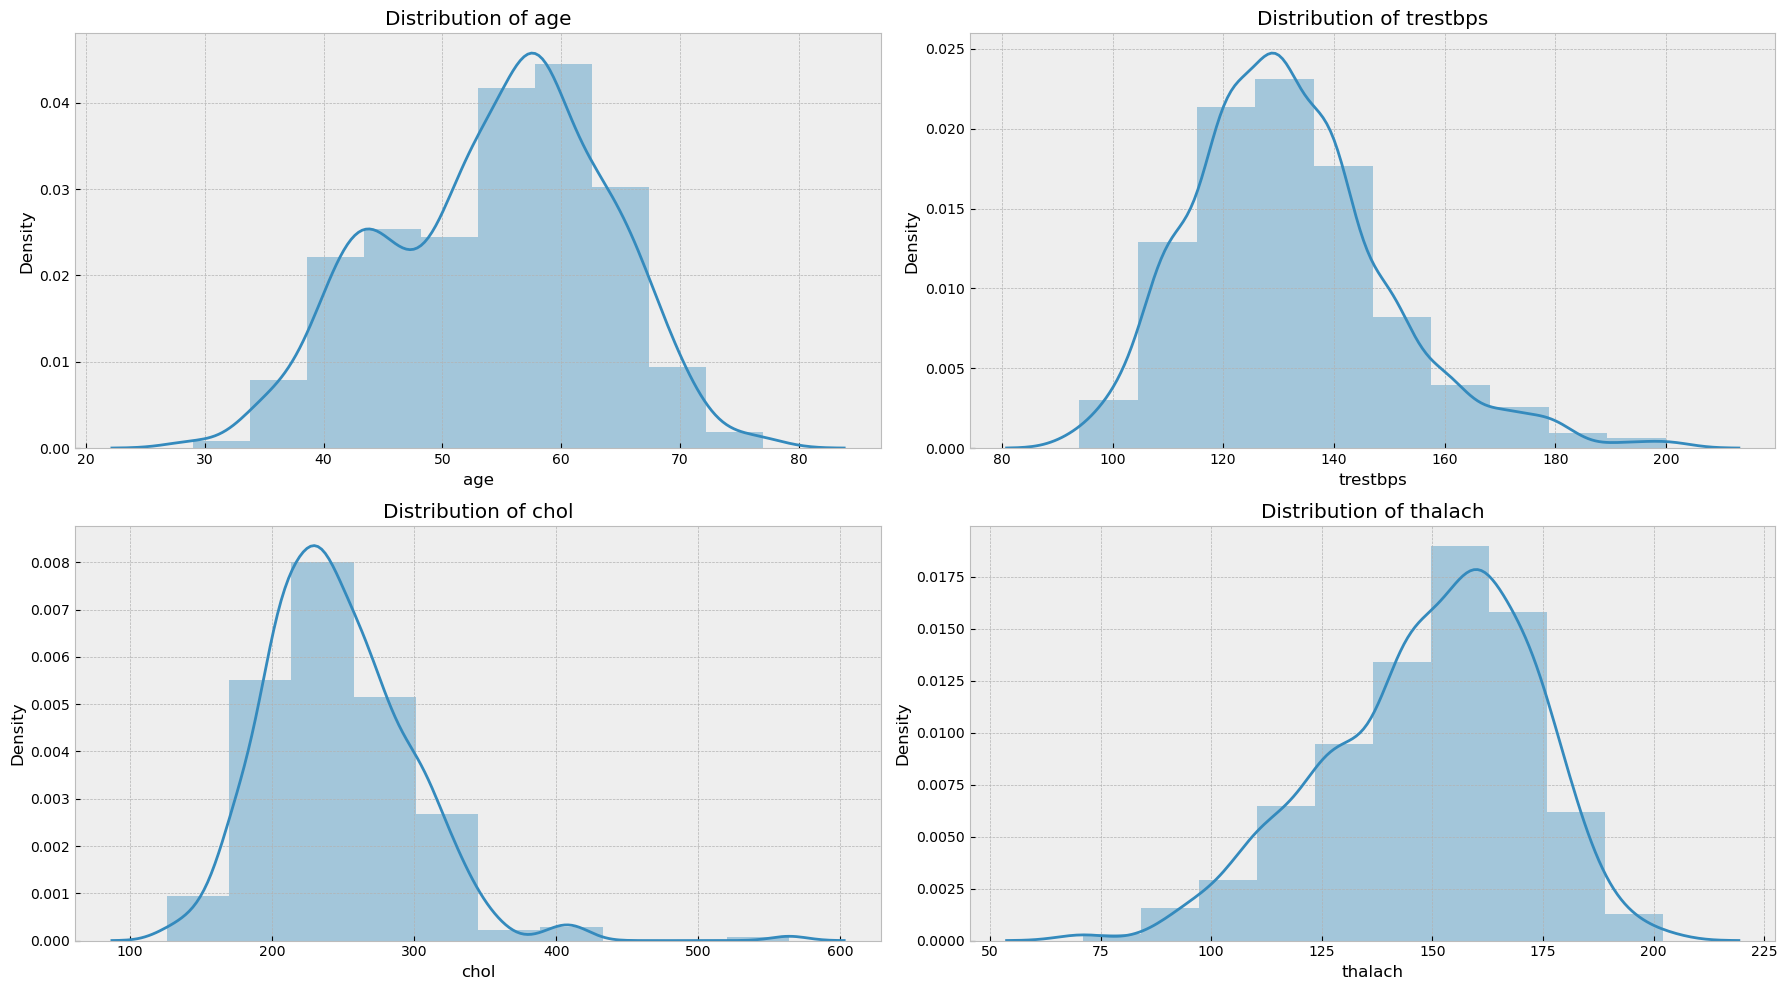

In [14]:
features = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.distplot(ds[feature].dropna(), kde=True, bins=10)  
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

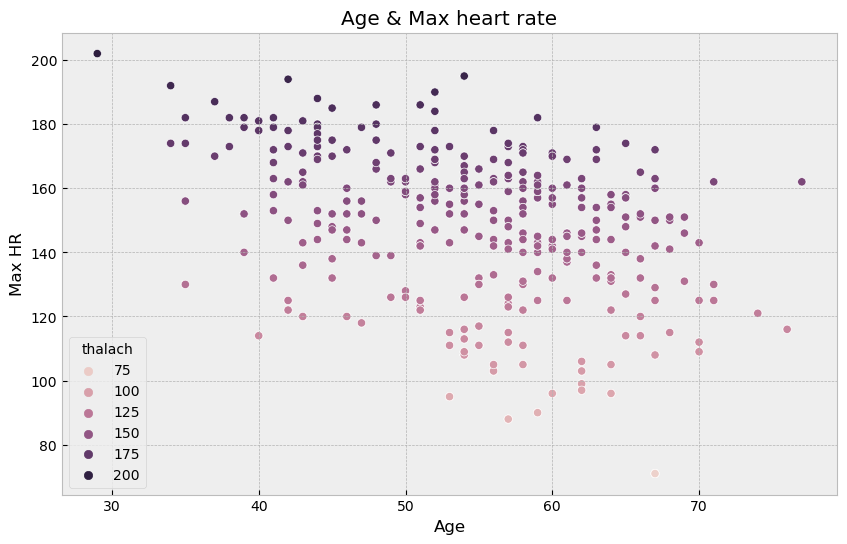

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='age', y='thalach', hue='thalach')
plt.title('Age & Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max HR')
plt.show()

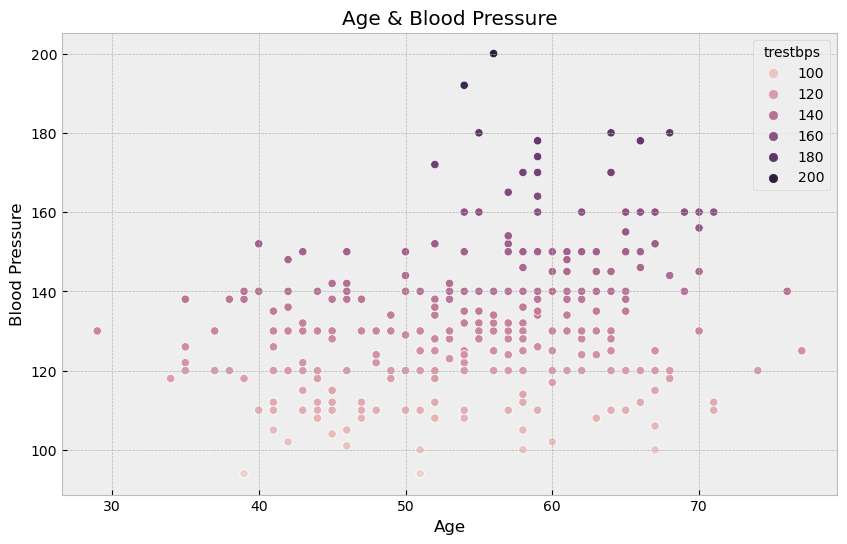

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='age', y='trestbps', hue='trestbps')  
plt.title('Age & Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

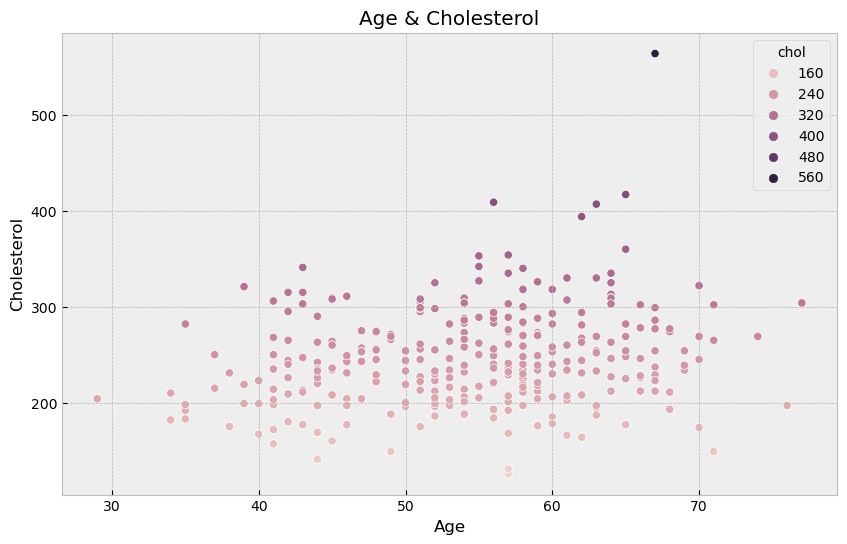

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='age', y='chol', hue='chol')
plt.title('Age & Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


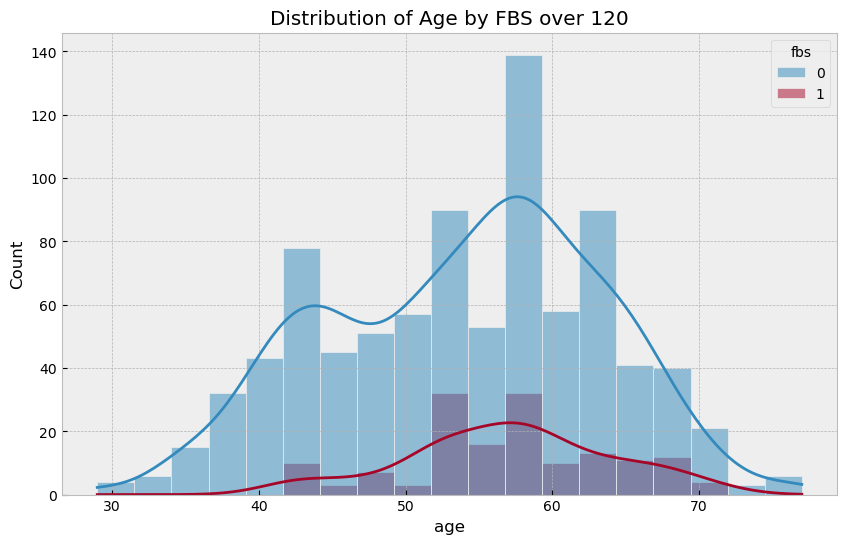

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='fbs', kde=True)
plt.title('Distribution of Age by FBS over 120')
plt.show()

C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


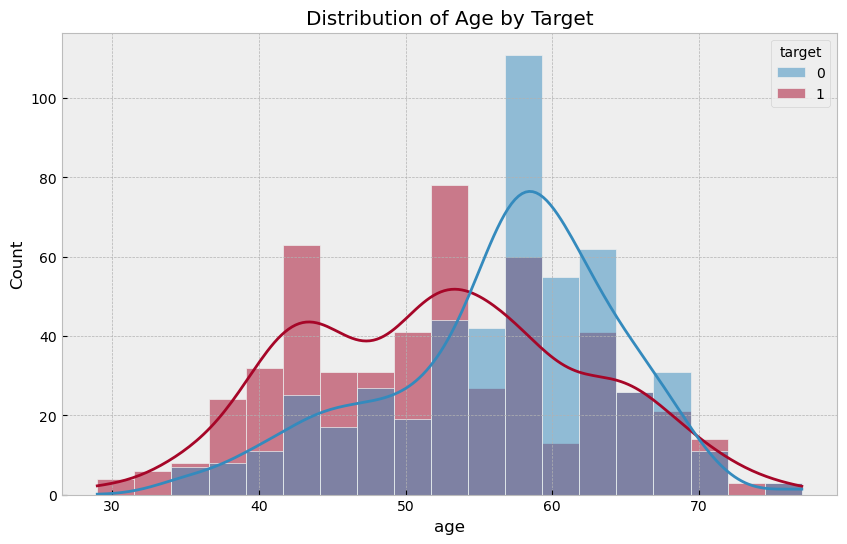

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='target', kde=True)
plt.title('Distribution of Age by Target')
plt.show()

C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


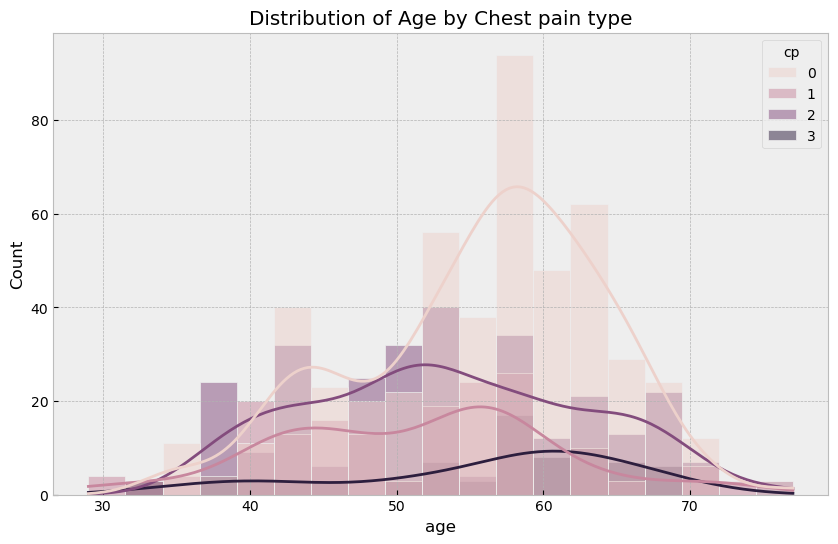

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='cp', kde=True)
plt.title('Distribution of Age by Chest pain type')
plt.show()

C:\Users\notsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


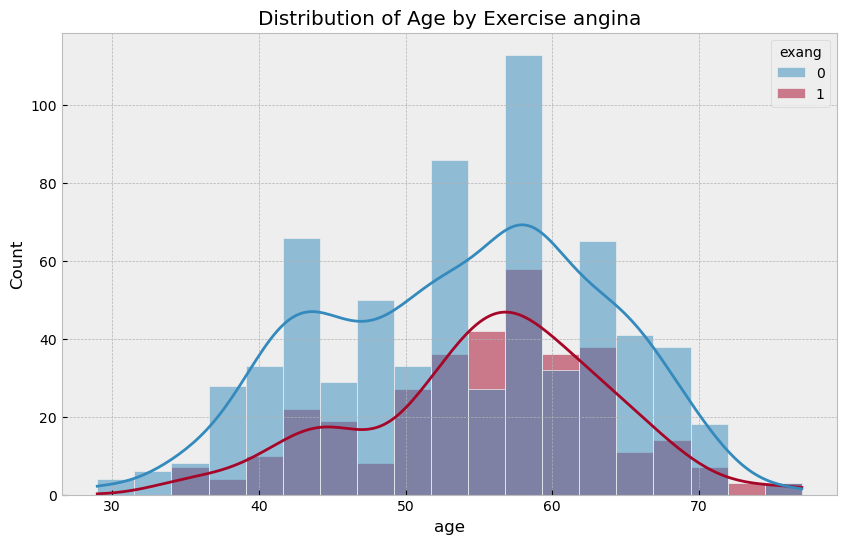

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='exang', kde=True)
plt.title('Distribution of Age by Exercise angina')
plt.show()

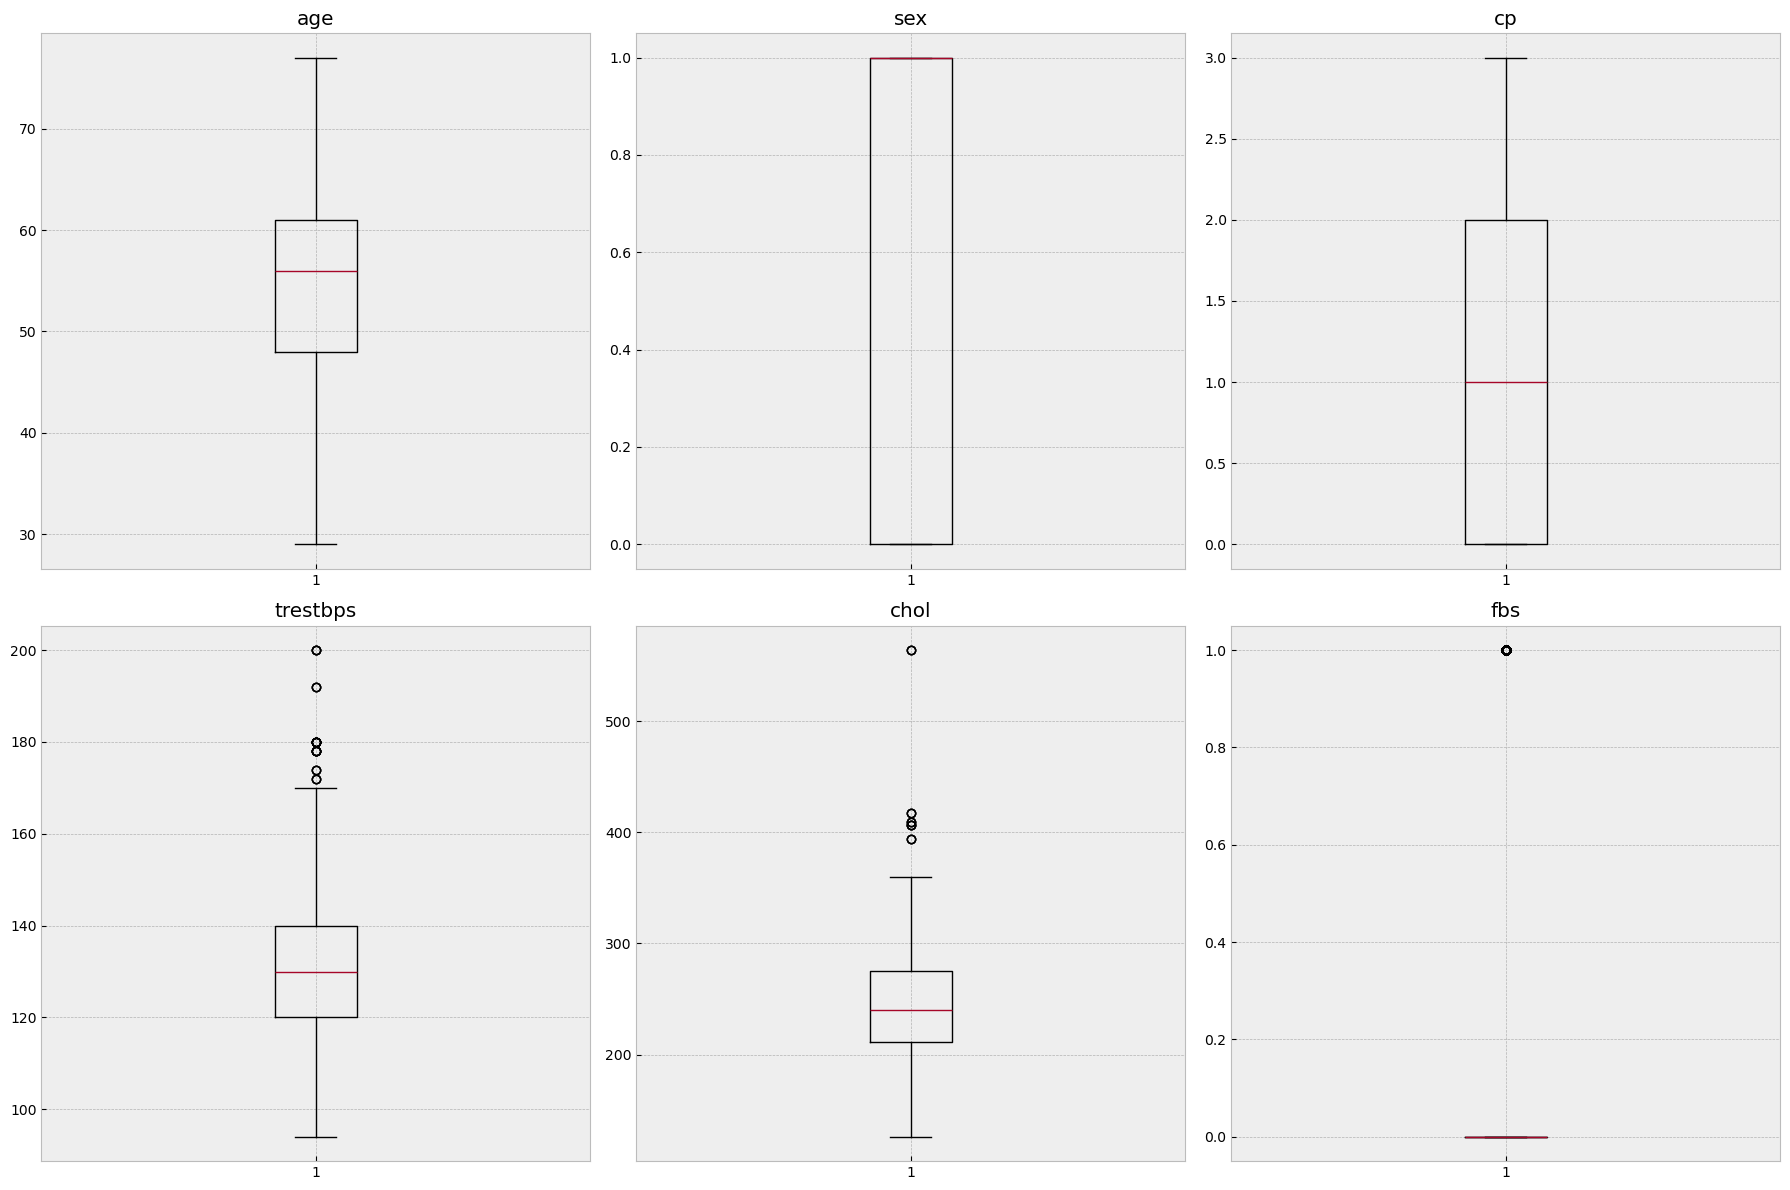

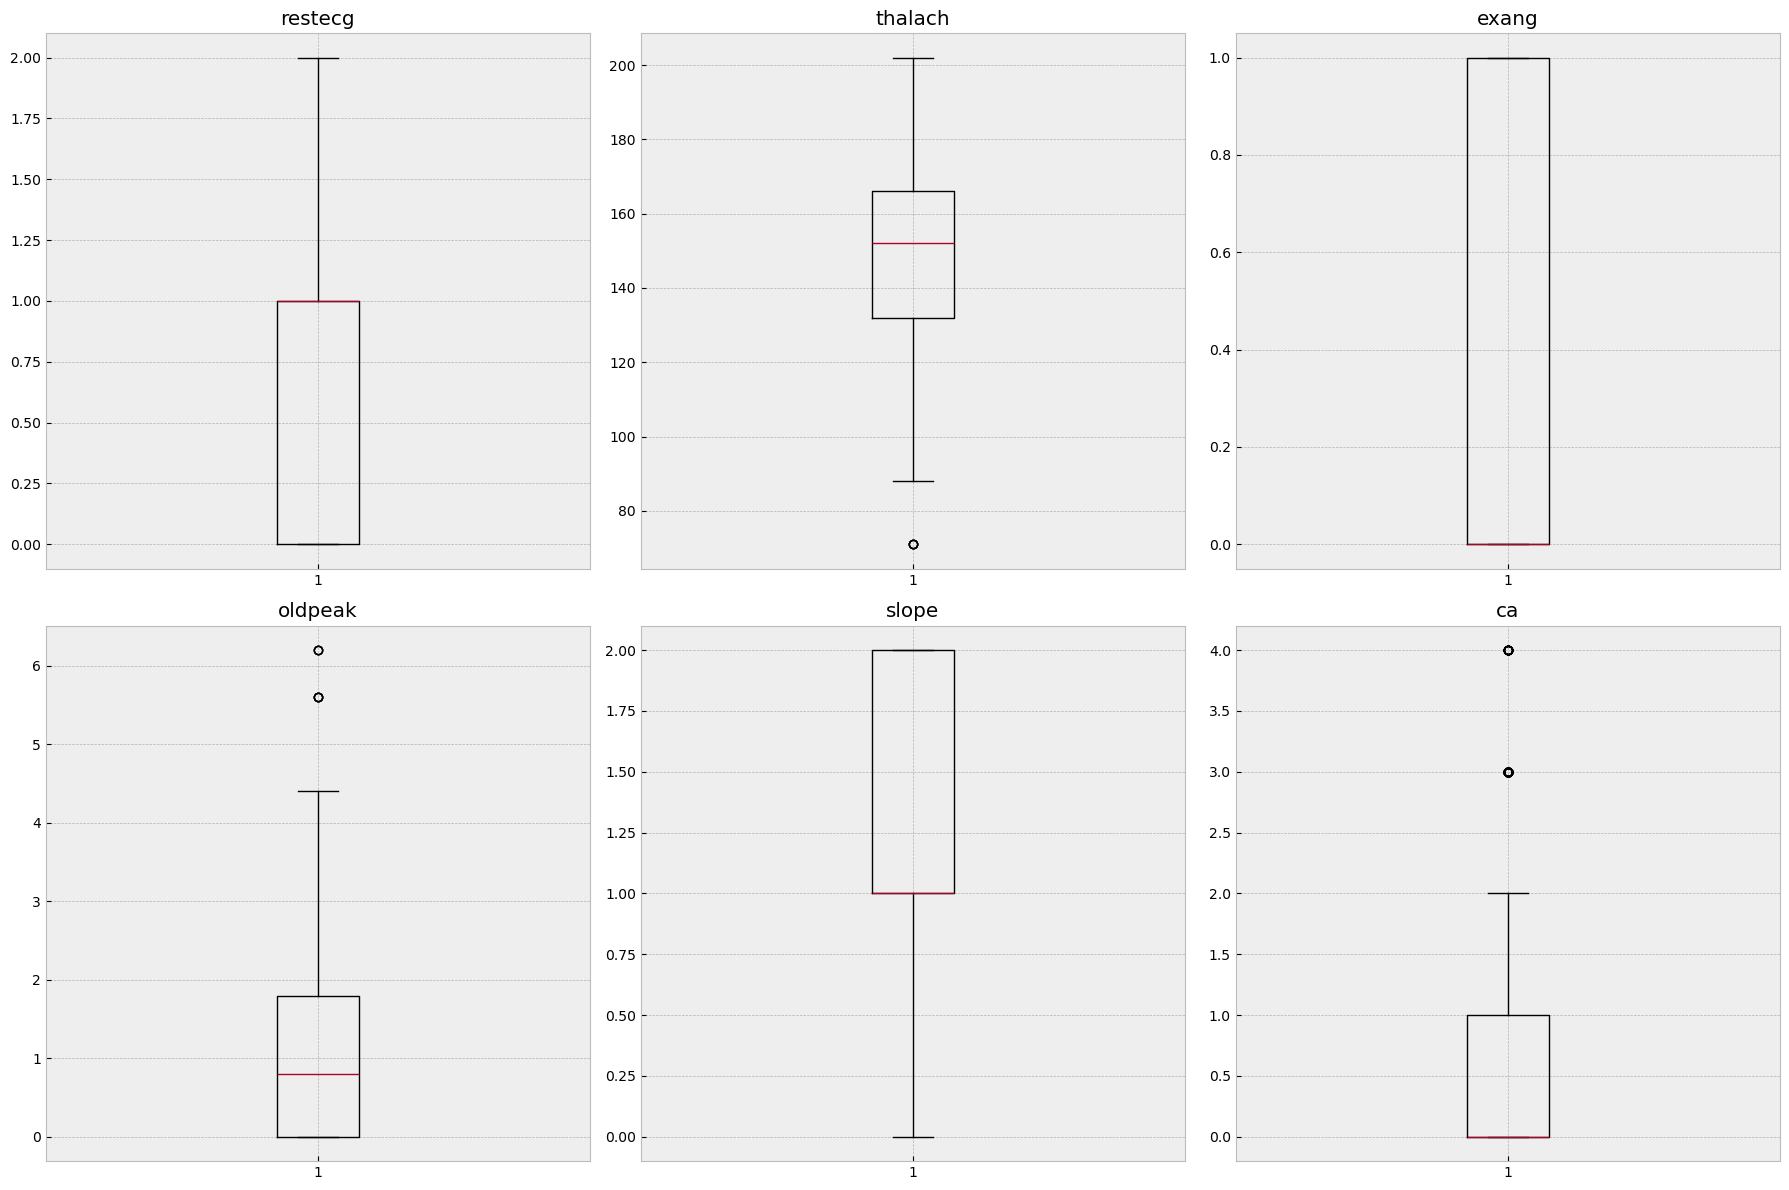

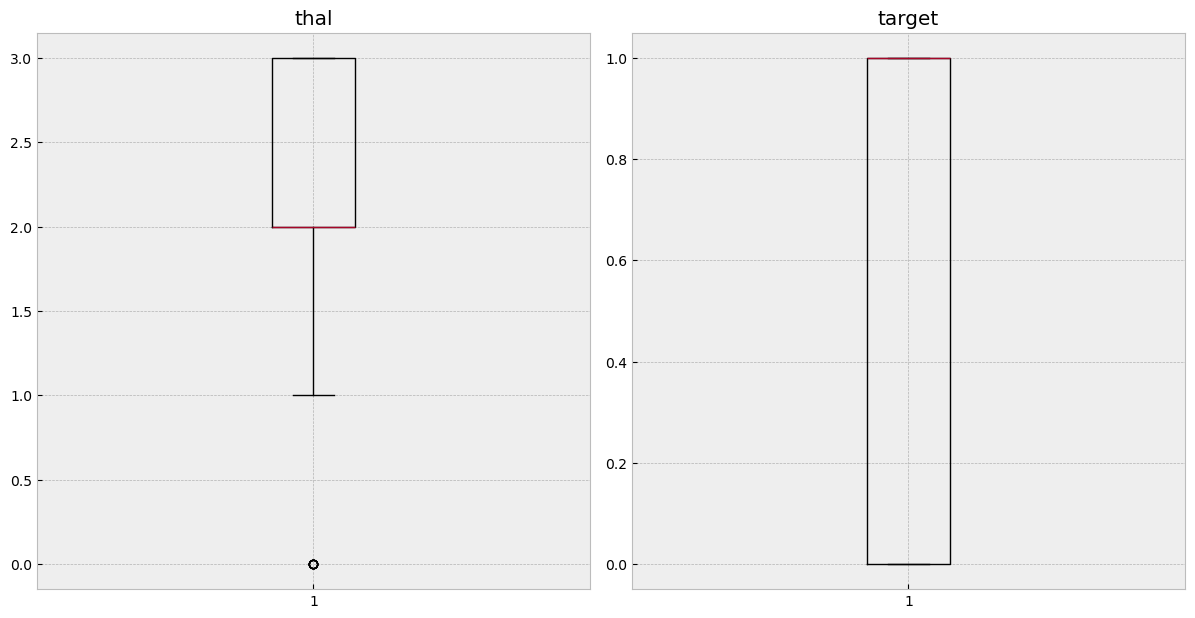

In [22]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

features_per_figure = 6

for i in range(0, len(features), features_per_figure):
    plt.figure(figsize=(18, 12))
    
    for j in range(features_per_figure):
        if i + j < len(features):
            plt.subplot(2, 3, j + 1)
            plt.boxplot(ds[features[i + j]])
            plt.title(f'{features[i + j]}')
    
    plt.tight_layout()
    plt.show()

In [23]:
correlation_matrix=ds.corr()

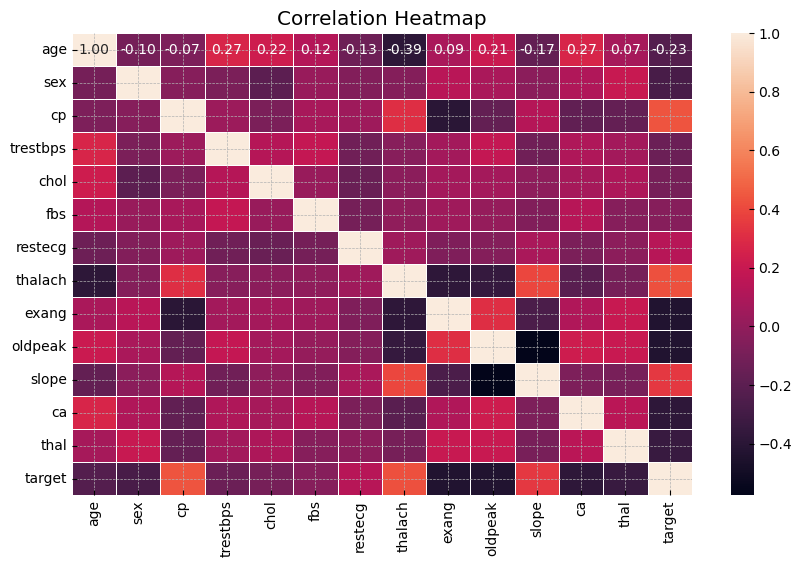

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Model EVO.

In [25]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1

ds= ds[~((ds < (Q1 - 1.5 * IQR)) | (ds > (Q3 + 1.5 * IQR))).any(axis=1)]

ds_clean = ds.drop_duplicates()
print(ds_clean.shape)
X = ds_clean.drop(columns=['target'])
y = ds_clean['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

(228, 14)


In [34]:
print(X)

[[-0.14478975  0.69319512 -0.92635418 ...  0.93452883  2.18230362
   1.22384   ]
 [ 1.80987186  0.69319512 -0.92635418 ... -2.47463235 -0.68550748
   1.22384   ]
 [ 0.83254106  0.69319512 -0.92635418 ...  0.93452883  0.74839807
   1.22384   ]
 ...
 [-0.14478975  0.69319512 -0.92635418 ...  0.93452883  0.74839807
   1.22384   ]
 [ 0.61535643  0.69319512  2.0207447  ...  0.93452883 -0.68550748
  -0.56484923]
 [ 0.07239487  0.69319512 -0.92635418 ... -0.77005176  0.74839807
   1.22384   ]]


In [35]:
print(y)

0      0
2      0
3      0
5      1
7      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 228, dtype: int64


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

results = {}

for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Best Estimator': best_clf,
        'Accuracy': accuracy,
        'Classification Report': report
    }

    print(f"Classifier: {name}")
    print(f"Best Estimator: {best_clf}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Classifier: Logistic Regression
Best Estimator: LogisticRegression(C=10, max_iter=1000)
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.93      0.84      0.88        31

    accuracy                           0.85        46
   macro avg       0.83      0.85      0.83        46
weighted avg       0.86      0.85      0.85        46

------------------------------------------------------------
Classifier: Random Forest
Best Estimator: RandomForestClassifier(n_estimators=200, random_state=42)
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.90      0.90      0.90        31

    accuracy                           0.87        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.87      0.87      0.87        46

---------------------

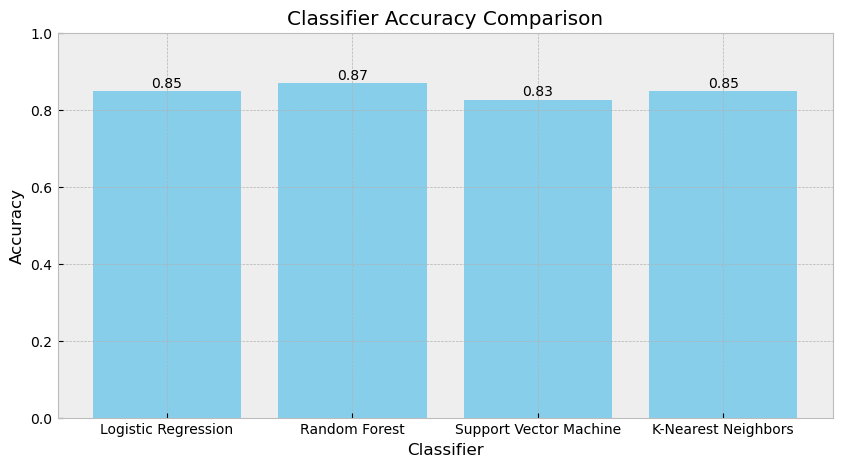

In [38]:
classifier_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in classifier_names]


plt.figure(figsize=(10, 5))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim([0, 1])  
for i in range(len(classifier_names)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()

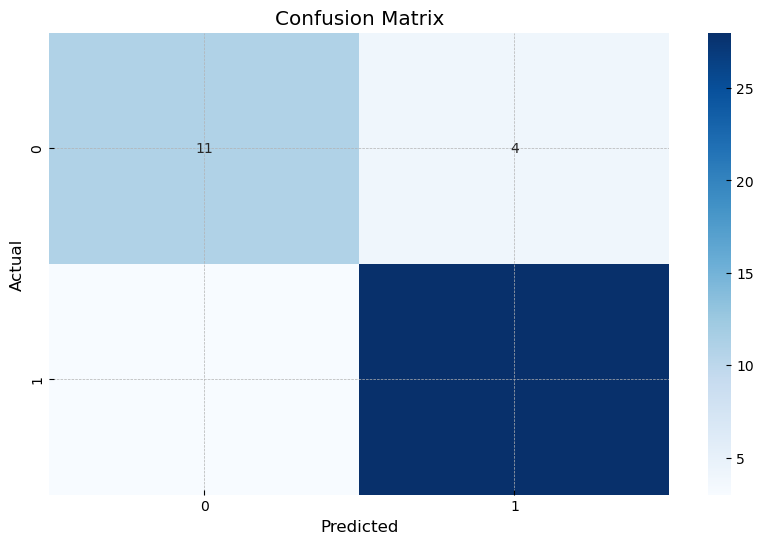

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model_1 = results[best_model_name]['Best Estimator']
print(best_model_1)

joblib.dump(best_model_1,'best_model.pkl')

best_model = joblib.load('best_model.pkl')

def predict_heart_disease():
    try:
        
        features = [float(entry.get()) for entry in entries]
        
        
        features = np.array(features).reshape(1, -1)
        prediction = best_model.predict(features)
        probability = best_model.predict_proba(features)[0][1] * 100
        
        result_text.set(f"Heart Disease Probability: {probability:.2f}%")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")


root = tk.Tk()
root.title("Heart Disease Predictor")


feature_names = ['Age', 'Sex (0 for Female & 1 for Male)', 'Chest Pain Type(0,1,2,3)', 'Resting Blood Pressure', 'Serum Cholestoral in mg/dl','Fasting Blood Sugar > 120 mg/dl(0 for No, 1 for Yes)','Resting Electrocardiographic Results (values 0,1,2)','Maximum Heart Rate Achieved','Exercise Induced Angina(0 for No, 1 for Yes)','Oldpeak','The Slope Of The Peak exercise ST segment',' number of major vessels (0-3) colored by flourosopy','thal: 0 = normal; 1 = fixed defect; 2 = reversable defect']  

entries = []
for feature in feature_names:
    frame = tk.Frame(root)
    label = tk.Label(frame, text=feature)
    label.pack(side="left")
    entry = tk.Entry(frame)
    entry.pack(side="left")
    frame.pack()
    entries.append(entry)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text, font=("Helvetica", 16))
result_label.pack()

predict_button = tk.Button(root, text="Predict", command=predict_heart_disease)
predict_button.pack()

root.mainloop()

RandomForestClassifier(n_estimators=200, random_state=42)
